In [1]:
from myastrotools.tools import MakeModelPlanet

# Warm Jupiter
HD 143761 b, metal = 3x solar, C/O = 0.5

In [3]:
from myastrotools.tools import MakeModelPlanet
import picaso.justdoit as jdi
import picaso.justplotit as jpi
    
# HD 143761 b warm jupiter:
## Planet:
planettype = 'WarmJup'
tint = 100 # Internal Temperature of your Planet in K
Teq = 600 # planet equilibrium temperature 
radius = 11.34 #Rearth
radius = radius*u.Rearth.to(u.Rjup)
msinij = 349.613*u.Mearth.to(u.Mjup) 
semi_major = 0.23 # star planet distance, AU

## Star:
T_star = 5777.0 # K, star effective temperature
logg = 4.0 #logg , cgs
metal = -0.03 # metallicity of star
r_star = 1.0 # solar radius

## Climate:
nlevel = 91 # number of plane-parallel levels in your code
nofczns = 1 # number of convective zones initially. Let's not play with this for now.
nstr_upper = 85 # top most level of guessed convective zone
nstr_deep = nlevel -2 # this is always the case. Dont change this
nstr = np.array([0,nstr_upper,nstr_deep,0,0,0]) # initial guess of convective zones
rfacv = 0.5

## Opacities:
planet_mh_str = '+050'#'+0.5' #log metallicity
planet_mh = float(planet_mh_str[1:])/100
planet_mh_CtoO_str = '050'#'0.5' # CtoO ratio
ck_db = f'/Volumes/Oy/picaso/reference/kcoeff_2020/sonora_2020_feh{planet_mh_str}_co_{planet_mh_CtoO_str}.data.196'
opacity_ck = jdi.opannection(ck_db=ck_db)

# cloud properties:
mean_molecular_weight = 2.2
fsed = 1
kz = 1e9

# save model params
filename = f'{planettype}-Teq{Teq}-sep{semi_major}-mh{planet_mh_str}-co{planet_mh_CtoO_str}-fsed{fsed}-Tstar{T_star}-mmw{mean_molecular_weight}.nc'
savefilename = '/Volumes/Oy/Reflected-Light-Ames/models/'+filename

    
    
planet_properties = {
    'tint':tint, 'Teq':Teq, 'radius':radius, 'radius_unit':u.Rjup,
     'mass':msinij, 'mass_unit': u.Mjup,
     'gravity': None, 'gravity_unit':None,
    'semi_major':semi_major, 'semi_major_unit': u.AU,
    'mh': planet_mh, 'CtoO':planet_mh_CtoO_str
}

star_properties = {
    'Teff':T_star, 'logg':logg, 'mh':metal, 'radius':r_star
}

climate_run_setup = {
    'nlevel':nlevel, 'nofczns':nofczns, 'nstr_upper':nstr_upper,
    'nstr_deep':nstr_deep, 'rfacv':rfacv
}

cloud_properties = {
    'fsed':fsed, 'mean_mol_weight': mean_molecular_weight, 'kz':kz
}


wj = MakeModelPlanet(planet_properties, 
                        star_properties, 
                        opacity_ck,
                        use_guillotpt = True,
                        compute_climate = True,
                        cdict = climate_run_setup,
                        climate_pbottom = 2,
                        climate_ptop = -6, 
                        spectrum_wavelength_range = [0.5,1.8],
                        spectrum_calculation = 'reflected',
                        spectrum_resolution = 150,
                        add_clouds = False,
                        clouddict = cloud_properties, 
                        savemodel = False,
                        savefilename = savefilename
             )
os.system('say "Done"')

starting climate run
Iteration number  0 , min , max temp  513.6582892440036 1354.6033641602878 , flux balance  510.4517200601136
Iteration number  1 , min , max temp  488.58655266810644 1813.3286246157263 , flux balance  361.6357315136332
Iteration number  2 , min , max temp  428.8421902768315 1765.0927147580092 , flux balance  67.16604241328699
Iteration number  3 , min , max temp  410.6131455719998 1759.5896776953662 , flux balance  2.513425519596074
Iteration number  4 , min , max temp  409.0160411662775 1759.5361855973383 , flux balance  0.005799219254985604
In t_start: Converged Solution in iterations  4
Big iteration is  409.0160411662775 0
Iteration number  0 , min , max temp  414.85938929117435 1682.048846334821 , flux balance  4.963327132230755
Iteration number  1 , min , max temp  414.744539323664 1668.6833713825192 , flux balance  0.0204263022776859
Iteration number  2 , min , max temp  414.7444721229502 1668.3216818918304 , flux balance  5.845410759304405e-06
In t_start: C

0

<IPython.core.display.Javascript object>


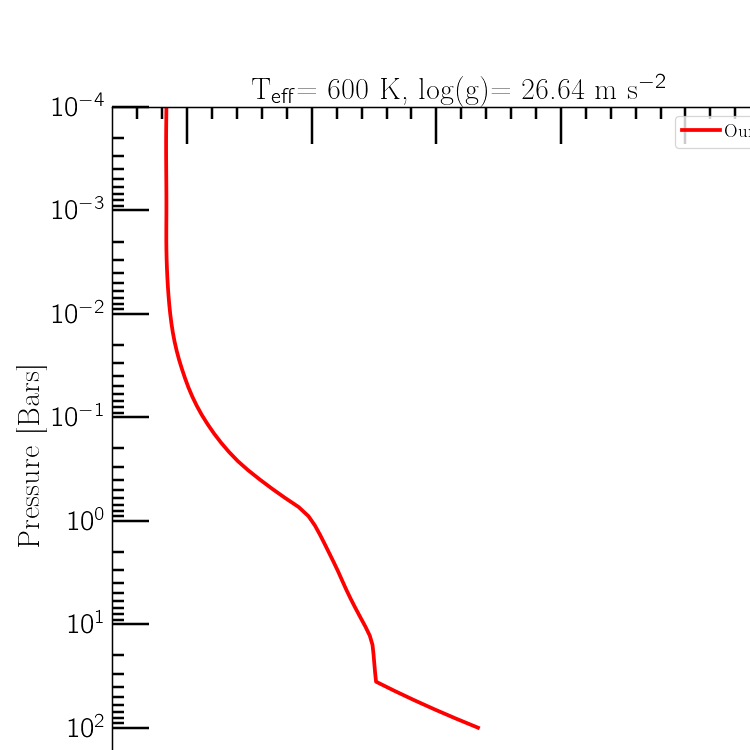

Text(0.5, 1.0, 'T$_{\\rm eff}$= 600 K, log(g)= 26.64 m s$^{-2}$')

In [13]:
pl, noclouds, noclouds_spec_spectrum, w_noclouds, f_noclouds = wj

%matplotlib notebook
plt.figure(figsize=(10,10))
plt.ylabel("Pressure [Bars]", fontsize=25)
plt.xlabel('Temperature [K]', fontsize=25)
plt.ylim(500,1e-4)
plt.xlim(200,3000)

plt.semilogy(noclouds['temperature'],noclouds['pressure'],color="r",linewidth=3,label="Our Run")

plt.minorticks_on()
plt.tick_params(axis='both',which='major',length =30, width=2,direction='in',labelsize=23)
plt.tick_params(axis='both',which='minor',length =10, width=2,direction='in',labelsize=23)

plt.legend(fontsize=15)

plt.title(r"T$_{\rm eff}$= "+str(Teq)+" K, log(g)= "+\
          str(np.round(pl.inputs['planet']['gravity']/100, decimals=2))\
          +r" m s$^{-2}$",fontsize=25)

In [12]:
from virga import justdoit as vj
temperature = noclouds['temperature']
pressure = noclouds['pressure']
metallicity = 0.5

recommended = vj.recommend_gas(pressure, temperature, 10**(metallicity), 2.2,
                            #Turn on plotting
                             plot=True)

Exception: Alert: No M/H Dependence in Al2O3 Routine. Consult your local theorist to determine next steps.

# Cold Jupiter
HD 183263 b, metal = 3x solar, C/O = 0.5

In [3]:
import picaso.justdoit as jdi
import picaso.justplotit as jpi
    
# # HD 183263 b cold jupiter:
## Planet:
planettype = 'ColdJup'
tint= 100 # Internal Temperature of your Planet in K
Teq=240 # planet equilibrium temperature 
radius = 11.96#Rearth
radius = radius*u.Rearth.to(u.Rjup)
msinij = 3.704
semi_major = 1.508 # star planet distance, AU

## Star:
T_star = 5777.0 # K, star effective temperature
logg = 4.0 #logg , cgs
metal = -0.03 # metallicity of star
r_star = 1.0 # solar radius

## Climate:
nlevel = 91 # number of plane-parallel levels in your code
nofczns = 1 # number of convective zones initially. Let's not play with this for now.
nstr_upper = 85 # top most level of guessed convective zone
nstr_deep = nlevel -2 # this is always the case. Dont change this
nstr = np.array([0,nstr_upper,nstr_deep,0,0,0]) # initial guess of convective zones
rfacv = 0.5

## Opacities:
planet_mh_str = '+050'#'+0.5' #log metallicity
planet_mh = float(planet_mh_str[1:])/100
planet_mh_CtoO_str = '050'#'0.5' # CtoO ratio
ck_db = f'/Volumes/Oy/picaso/reference/kcoeff_2020/sonora_2020_feh{planet_mh_str}_co_{planet_mh_CtoO_str}.data.196'
opacity_ck = jdi.opannection(ck_db=ck_db)

# cloud properties:
mean_molecular_weight = 2.2
fsed = 1
kz = 1e9

# save model params
filename = f'{planettype}-Teq{Teq}-sep{semi_major}-mh{planet_mh_str}-co{planet_mh_CtoO_str}-fsed{fsed}-Tstar{T_star}-mmw{mean_molecular_weight}.nc'
savefilename = '/Volumes/Oy/Reflected-Light-Ames/models/'+filename

    
    
planet_properties = {
    'tint':tint, 'Teq':Teq, 'radius':radius, 'radius_unit':u.Rjup,
     'mass':msinij, 'mass_unit': u.Mjup,
     'gravity': None, 'gravity_unit':None,
    'semi_major':semi_major, 'semi_major_unit': u.AU,
    'mh': planet_mh, 'CtoO':planet_mh_CtoO_str
}

star_properties = {
    'Teff':T_star, 'logg':logg, 'mh':metal, 'radius':r_star
}

climate_run_setup = {
    'nlevel':nlevel, 'nofczns':nofczns, 'nstr_upper':nstr_upper,
    'nstr_deep':nstr_deep, 'rfacv':rfacv
}

cloud_properties = {
    'fsed':fsed, 'mean_mol_weight': mean_molecular_weight, 'kz':kz
}


cj = MakeModelPlanet(planet_properties, 
                        star_properties, 
                        opacity_ck,
                        use_guillotpt = True,
                        compute_climate = True,
                        cdict = climate_run_setup,
                        climate_pbottom = 2,
                        climate_ptop = -6, 
                        clouddict = cloud_properties, 
                        savemodel = True,
                        savefilename = savefilename
             )

starting climate run
Iteration number  0 , min , max temp  206.87793376864522 613.5879230808773 , flux balance  18.471514172944232
Iteration number  1 , min , max temp  190.39911841829687 975.422410488547 , flux balance  11.348948541850131
Iteration number  2 , min , max temp  162.3814494554167 905.5885688039037 , flux balance  2.124506100558961
Iteration number  3 , min , max temp  153.09408163986132 895.2543621299661 , flux balance  0.11355896416006152
Iteration number  4 , min , max temp  152.30356686357828 895.0419450813727 , flux balance  0.0005692029191680882
Iteration number  5 , min , max temp  152.29830157924934 895.0418178650735 , flux balance  1.0503826862419513e-07
In t_start: Converged Solution in iterations  5
Big iteration is  152.29830157924934 0
Iteration number  0 , min , max temp  160.26381377837458 938.9172922159177 , flux balance  3.4359808999666215
Iteration number  1 , min , max temp  175.9203010666003 1088.042541908672 , flux balance  0.6022817583472486
Iteratio

Exception: Alert: No M/H Dependence in Al2O3 Routine. Consult your local theorist to determine next steps.

# Warm Neptune
HD 190007 b, metal = 100x solar, C/O = 0.5

In [ ]:
import picaso.justdoit as jdi
import picaso.justplotit as jpi
    
# # HD 190007 b cold jupiter:
## Planet:
planettype = 'WarmNep'
tint = 100 # Internal Temperature of your Planet in K
Teq = 596 # planet equilibrium temperature 
radius = 4.08 #Rearth
radius = radius*u.Rearth.to(u.Rjup)
msinij = 16.46*u.Mearth.to(u.Mjup)
semi_major = 0.092 # star planet distance, AU

## Star:
T_star = 4610. # K, star effective temperature
logg = 4.0 #logg , cgs
metal = -0.03 # metallicity of star
r_star = 0.8 # solar radius

## Climate:
nlevel = 91 # number of plane-parallel levels in your code
nofczns = 1 # number of convective zones initially. Let's not play with this for now.
nstr_upper = 85 # top most level of guessed convective zone
nstr_deep = nlevel -2 # this is always the case. Dont change this
nstr = np.array([0,nstr_upper,nstr_deep,0,0,0]) # initial guess of convective zones
rfacv = 0.5

## Opacities:
planet_mh_str = '+200'#'+2' #log metallicity
planet_mh = float(planet_mh_str[1:])/100
planet_mh_CtoO_str = '050'#'0.5' # CtoO ratio
ck_db = f'/Volumes/Oy/picaso/reference/kcoeff_2020/sonora_2020_feh{planet_mh_str}_co_{planet_mh_CtoO_str}.data.196'
opacity_ck = jdi.opannection(ck_db=ck_db)

# cloud properties:
mean_molecular_weight = 2.2
fsed = 1
kz = 1e9

# save model params
filename = f'{planettype}-Teq{Teq}-sep{semi_major}-mh{planet_mh_str}-co{planet_mh_CtoO_str}-fsed{fsed}-Tstar{T_star}-mmw{mean_molecular_weight}.nc'
savefilename = '/Volumes/Oy/Reflected-Light-Ames/models/'+filename

    
    
planet_properties = {
    'tint':tint, 'Teq':Teq, 'radius':radius, 'radius_unit':u.Rjup,
     'mass':msinij, 'mass_unit': u.Mjup,
     'gravity': None, 'gravity_unit':None,
    'semi_major':semi_major, 'semi_major_unit': u.AU,
    'mh': planet_mh, 'CtoO':planet_mh_CtoO_str
}

star_properties = {
    'Teff':T_star, 'logg':logg, 'mh':metal, 'radius':r_star
}

climate_run_setup = {
    'nlevel':nlevel, 'nofczns':nofczns, 'nstr_upper':nstr_upper,
    'nstr_deep':nstr_deep, 'rfacv':rfacv
}

cloud_properties = {
    'fsed':fsed, 'mean_mol_weight': mean_molecular_weight, 'kz':kz
}


wn = MakeModelPlanet(planet_properties, 
                        star_properties, 
                        opacity_ck,
                        use_guillotpt = True,
                        compute_climate = True,
                        cdict = climate_run_setup,
                        climate_pbottom = 2,
                        climate_ptop = -6, 
                        clouddict = cloud_properties, 
                        savemodel = True,
                        savefilename = savefilename
             )

# Cold Neptune
GJ 687 b, metal 100x solar, C/O 0.5

In [27]:
import picaso.justdoit as jdi
import picaso.justplotit as jpi
    
# # GJ 687 b cold jupiter:
## Planet:
planettype = 'ColdNep'
tint = 100 # Internal Temperature of your Planet in K
Teq = 245 # planet equilibrium temperature 
radius = 4.3 #Rearth
radius = radius*u.Rearth.to(u.Rjup)
msinij = 17.6*u.Mearth.to(u.Mjup)
semi_major = 0.1658 # star planet distance, AU

## Star:
T_star = 3561.3 # K, star effective temperature
logg = 4.0 #logg , cgs
metal = -0.03 # metallicity of star
r_star = 0.8 # solar radius

## Climate:
nlevel = 91 # number of plane-parallel levels in your code
nofczns = 1 # number of convective zones initially. Let's not play with this for now.
nstr_upper = 85 # top most level of guessed convective zone
nstr_deep = nlevel -2 # this is always the case. Dont change this
nstr = np.array([0,nstr_upper,nstr_deep,0,0,0]) # initial guess of convective zones
rfacv = 0.5

## Opacities:
#planet_mh_str = '+200'#'+2' #log metallicity
planet_mh_str = '+100'#'+2' #log metallicity
planet_mh = float(planet_mh_str[1:])/100
planet_mh_CtoO_str = '100'#'0.5' # CtoO ratio
ck_db = f'/Volumes/Oy/picaso/reference/kcoeff_2020/sonora_2020_feh{planet_mh_str}_co_{planet_mh_CtoO_str}.data.196'
opacity_ck = jdi.opannection(ck_db=ck_db)

# cloud properties:
mean_molecular_weight = 2.2
fsed = 1
kz = 1e9

# save model params
filename = f'{planettype}-Teq{Teq}-sep{semi_major}-mh{planet_mh_str}-co{planet_mh_CtoO_str}-fsed{fsed}-Tstar{T_star}-mmw{mean_molecular_weight}.nc'
savefilename = '/Volumes/Oy/Reflected-Light-Ames/models/'+filename

    
    
planet_properties = {
    'tint':tint, 'Teq':Teq, 'radius':radius, 'radius_unit':u.Rjup,
     'mass':msinij, 'mass_unit': u.Mjup,
     'gravity': None, 'gravity_unit':None,
    'semi_major':semi_major, 'semi_major_unit': u.AU,
    'mh': planet_mh, 'CtoO':planet_mh_CtoO_str
}

star_properties = {
    'Teff':T_star, 'logg':logg, 'mh':metal, 'radius':r_star
}

climate_run_setup = {
    'nlevel':nlevel, 'nofczns':nofczns, 'nstr_upper':nstr_upper,
    'nstr_deep':nstr_deep, 'rfacv':rfacv
}

cloud_properties = {
    'fsed':fsed, 'mean_mol_weight': mean_molecular_weight, 'kz':kz
}


cn = MakeModelPlanet(planet_properties, 
                        star_properties, 
                        opacity_ck,
                        use_guillotpt = True,
                        compute_climate = True,
                        cdict = climate_run_setup,
                        climate_pbottom = 2,
                        climate_ptop = -6, 
                        clouddict = cloud_properties, 
                        savemodel = True,
                        savefilename = savefilename
             )

starting climate run
Iteration number  0 , min , max temp  216.68379289926932 819.9053624748868 , flux balance  -138.18621719854343
Iteration number  1 , min , max temp  255.5295241113633 1421.1923470018353 , flux balance  -120.9636807566451
Iteration number  2 , min , max temp  317.8184297205551 1514.5780078221571 , flux balance  -47.67946147724034
Iteration number  3 , min , max temp  347.29264408838515 1570.3797653067284 , flux balance  6.262032335081082
Iteration number  4 , min , max temp  344.49328457749505 1562.996007986961 , flux balance  0.07717631429623156
Iteration number  5 , min , max temp  344.45463652355534 1562.810788275415 , flux balance  2.8274818226898803e-05
In t_start: Converged Solution in iterations  5
Big iteration is  344.45463652355534 0
Iteration number  0 , min , max temp  344.60662474454483 1573.4323862916056 , flux balance  -16.763126283074214
Iteration number  1 , min , max temp  345.37949468334335 1645.8325227415912 , flux balance  5.606091145411873
Iter

Exception: Alert: No M/H Dependence in Al2O3 Routine. Consult your local theorist to determine next steps.